# (Figure4_part1)-Profiling the Epithelial Cells Infected with H. pylori at Single-Cell Level.

In [1]:
import anndata as ad
import scanpy as sc
import omicverse as ov
import infercnvpy as cnv
import scglue


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.4, Tutorials: https://omicverse.readthedocs.io/


In [2]:
import os
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
import seaborn as sns
sns.set_style('white')

font_path = 'Gastric/Arial.ttf'
front_prop = FontProperties(fname=font_path)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [9]:
adata_raw = sc.read_h5ad('Gastric/Data/Gastric_Origin.h5ad')
adata_anno = sc.read_h5ad('Gastric/Data/Gastric_anno.h5ad')
adata_raw,adata_anno

(AnnData object with n_obs × n_vars = 63398 × 32559
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person'
     var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
     uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
     obsm: 'X_pca', 'X_scVI', 'X_umap'
     layers: 'counts'
     obsp: 'connectivities', 'distances',
 AnnData object with n_obs × n_vars = 63398 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person'
     var: 'n_cel

In [85]:
set(adata_anno.obs['major_celltype'])

{'B cell',
 'B cell(Plasma cell)',
 'Endocrine cell',
 'Endothelial cell',
 'Epithelial cell',
 'Fibroblast',
 'Mast cell',
 'Myeloid cell',
 'NK/T cell',
 'Neutrophil',
 'Smooth muscle cell'}

In [86]:
Epi = adata_anno[adata_anno.obs['major_celltype']=='Epithelial cell']
Epi_raw = adata_raw[Epi.obs_names,:]
Epi,Epi_raw

(View of AnnData object with n_obs × n_vars = 26288 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person'
     var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
     uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
     obsm: 'X_pca', 'X_scVI', 'X_umap'
     varm: 'PCs'
     layers: 'counts'
     obsp: 'connectivities', 'distances',
 View of AnnData object with n_obs × n_vars = 26288 × 32559
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_co

In [88]:
sc.pp.neighbors(Epi, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
sc.tl.leiden(Epi,resolution=1)
sc.tl.paga(Epi)
sc.pl.paga(Epi, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(Epi,init_pos='paga')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
running Leiden clustering
    finished: found 20 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:19)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:17)


[<AxesSubplot: title={'center': 'leiden'}, xlabel='X_umap1', ylabel='X_umap2'>,
 <AxesSubplot: title={'center': 'Sample'}, xlabel='X_umap1', ylabel='X_umap2'>,
 <AxesSubplot: title={'center': 'Person'}, xlabel='X_umap1', ylabel='X_umap2'>]

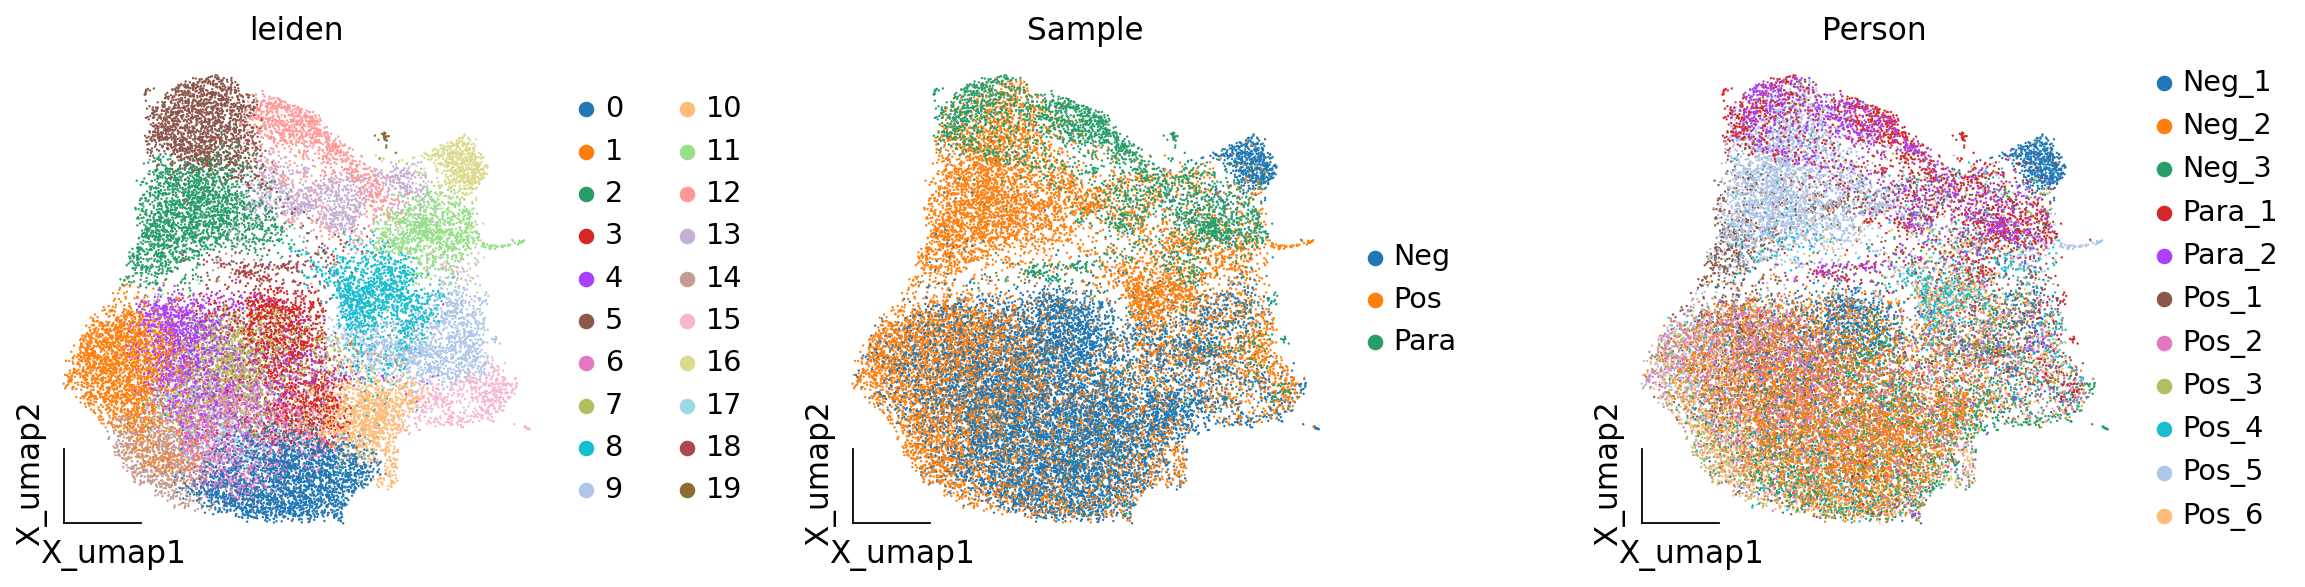

In [89]:
ov.pl.embedding(Epi,
                basis='X_umap',
                color=['leiden','Sample','Person'],
                frameon='small',
                cmap='viridis',
                show=False,wspace=0.4
                )

[<AxesSubplot: title={'center': 'leiden'}, xlabel='X_umap1', ylabel='X_umap2'>,
 <AxesSubplot: title={'center': 'Sample'}, xlabel='X_umap1', ylabel='X_umap2'>]

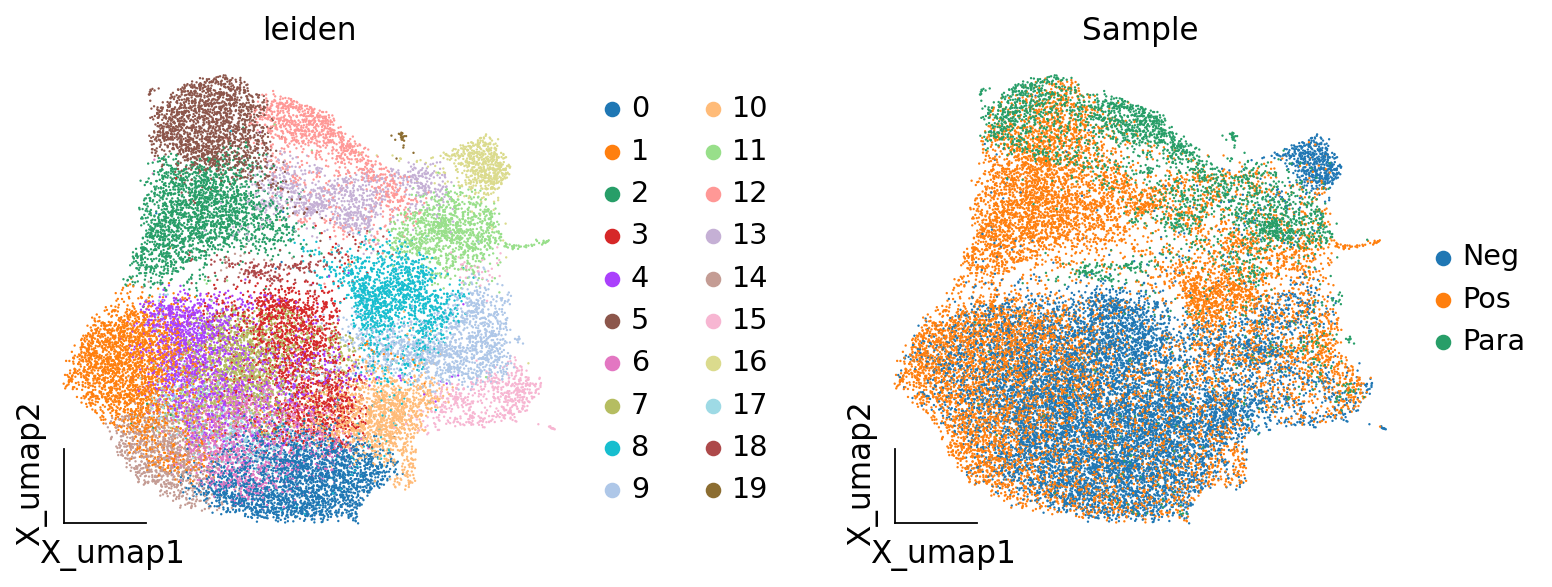

In [90]:
ov.pl.embedding(Epi,
                basis='X_umap',
                color=['leiden','Sample'],
                frameon='small',
                cmap='viridis',
                show=False,wspace=0.4
                )

In [92]:

marker_genes_dict = {
    'PMC':['GKN1','GKN2','MUC5AC','TFF1'],
    'PC':['MKI67','HMGB2','STMN1'],
    'PG':['MUC6','PGC'],
    'Enterocytes':['FABP1','FABP2','CDH17','CLDN7','CLDN4',], 
    'Goblet':['MUC2','ITLN1','TFF3','SPINK4'],
    'IM_Marker':['REG4','CDX1','CDX2'],
}

In [93]:
Epi = Epi[Epi.obs['leiden']!='19']
#Epi = Epi[Epi.obs['leiden']!='18']
Epi

View of AnnData object with n_obs × n_vars = 26265 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

    using 'X_pca' with n_pcs = 100
Storing dendrogram info using `.uns['dendrogram_leiden']`


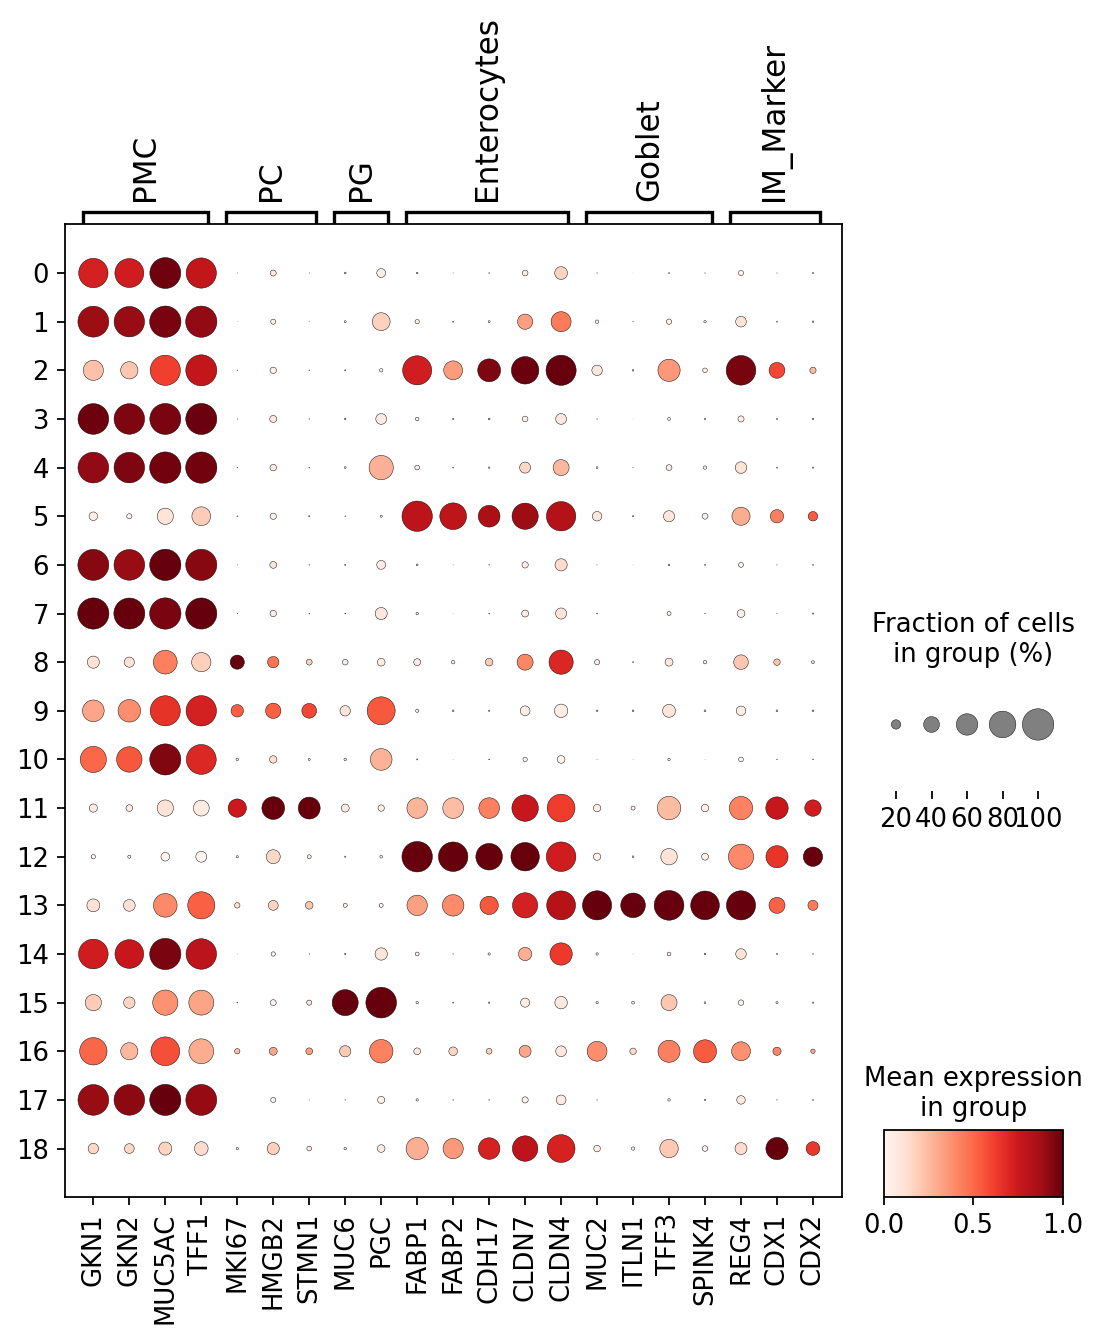

In [94]:
sc.tl.dendrogram(Epi,groupby='leiden')

ax = sc.pl.dotplot(
    Epi,
    marker_genes_dict,
    groupby='leiden',
    dendrogram=False,
    color_map="Reds",
    swap_axes=False,
    use_raw=True,
    standard_scale="var",
    var_group_labels=False, # 是否需要var
    figsize=(8,8),
    return_fig=False,
    show=False,
)

#plt.savefig("Gastric/Figure/Figure1/Figure1_G.png",dpi=300,bbox_inches = 'tight')

In [97]:
# create a dictionary to map cluster to annotation label
from pandas.api.types import CategoricalDtype

cluster2annotation = {
    '0': 'PMC',
    '1': 'PMC',
    '2': 'IM_Enterocytes',
    '3': 'PMC',
    '4': 'PMC',
    '5': 'IM_Enterocytes',
    '6': 'PMC',
    '7': 'PMC',
    '8': 'PC',
    '9': 'PC',
    '10': 'PMC',
    '11': 'IM_PC',
    '12': 'IM_Enterocytes',
    '13': 'IM_Goblet',
    '14': 'PMC',
    '15': 'PG',
    '16': 'IM_PG',
    '17': 'PMC',
    '18': 'IM_Enterocytes',
}

Epi.obs['Epi_celltype'] = Epi.obs['leiden'].map(cluster2annotation).astype('category')
new_order = CategoricalDtype(['PMC', 'PC', 'IM_PC','PG','IM_PG','IM_Enterocytes','IM_Goblet'], ordered=True)
Epi.obs['Epi_celltype'] = Epi.obs['Epi_celltype'].astype(new_order)


In [99]:
Epi.write_h5ad('Gastric/Data/Epi_anno.h5ad',compression='gzip')

# Plot

In [14]:
Epi = sc.read_h5ad('Gastric/Data/Epi_anno.h5ad')
Epi
sc.pp.neighbors(Epi, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
#sc.tl.leiden(Epi,resolution=1)
sc.tl.paga(Epi)
sc.pl.paga(Epi, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(Epi,init_pos='paga')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:18)


In [15]:
#Epi_celltype_colors = Epi.uns['Epi_celltype_colors']
#Epi.uns['Epi_celltype_colors'] = ov.pl.red_color[0:7]
#Epi.uns['Epi_celltype_colors'] = Epi_celltype_colors

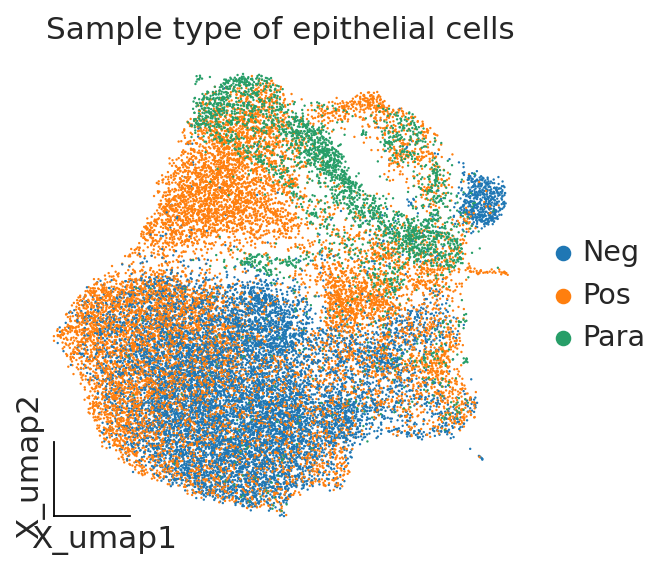

In [5]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots( figsize = (4,4))
ax = ov.utils.embedding(Epi,
                basis='X_umap',
                color=['Sample'],
                title='Sample type of epithelial cells',
                frameon='small',
                show=False,
                ax=ax)

plt.savefig("Gastric/Figure/Figure4/Figure4_A.png",dpi=300,bbox_inches = 'tight')

In [16]:
Epi.obs['IM'] = 'Normal cells'
Epi.obs.loc[Epi.obs['Epi_celltype'].isin(['IM_PC_MSC','IM_PG','IM_Enterocytes','IM_Goblet']),'IM'] = 'Intestinal metaplasia cells'
#Epi[~Epi.obs['Epi_celltype'].isin(['IM_PC_MSC','IM_PG','IM_Enterocytes','IM_Goblet')]].obs['IM'] == 'Normal cells'
Epi.obs['IM']

AAACCTGAGACCTAGG-1_0                    Normal cells
AAACCTGAGACGCACA-1_0     Intestinal metaplasia cells
AAACCTGAGCTCCTCT-1_0                    Normal cells
AAACCTGAGGCTCAGA-1_0                    Normal cells
AAACCTGCACTTAAGC-1_0                    Normal cells
                                    ...             
TTTGTCAAGGTGCAAC-1_11                   Normal cells
TTTGTCAAGGTGCACA-1_11    Intestinal metaplasia cells
TTTGTCACAAGAGGCT-1_11    Intestinal metaplasia cells
TTTGTCATCGGCGGTT-1_11    Intestinal metaplasia cells
TTTGTCATCTCGATGA-1_11    Intestinal metaplasia cells
Name: IM, Length: 26265, dtype: object

In [17]:
Epi.uns['Epi_celltype_colors'] = [ov.pl.blue_color[2],ov.pl.blue_color[3],ov.pl.red_color[4],ov.pl.blue_color[5],
                                  ov.pl.red_color[0],ov.pl.red_color[2],ov.pl.red_color[1]]

... storing 'IM' as categorical


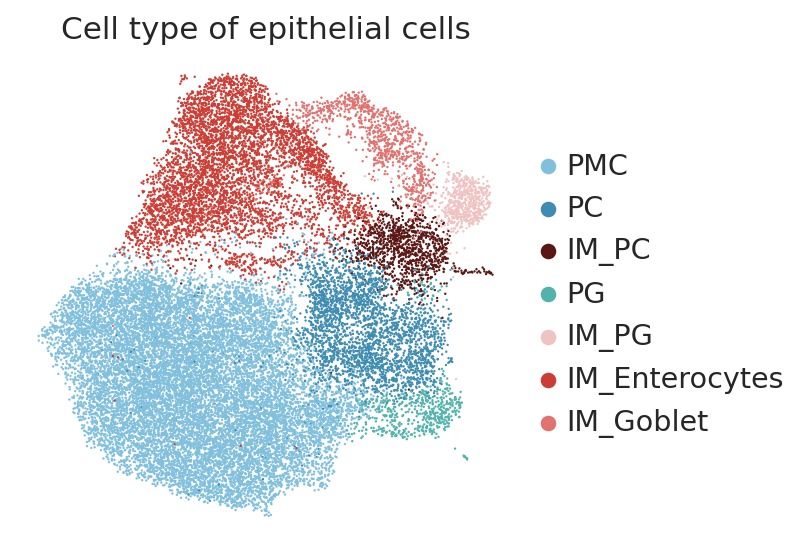

In [8]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots( figsize = (4,4))
ax = ov.utils.embedding(Epi,
                basis='X_umap',
                color=['Epi_celltype'],
                title='Cell type of epithelial cells',
                frameon=False,
                show=False,
                ax=ax)

plt.savefig("Gastric/Figure/Figure4/Figure4_B.png",dpi=300,bbox_inches = 'tight')

In [10]:
IM_Gene_list = ['FABP1','FABP2','CDH17','CLDN7','CLDN4','REG4','CDX1','CDX2']
Epi_all_genes = Epi.raw.to_adata()
sc.tl.score_genes(Epi_all_genes, IM_Gene_list, score_name='Intestinal metaplasia score')

computing score 'Intestinal metaplasia score'
    finished: added
    'Intestinal metaplasia score', score of gene set (adata.obs).
    200 total control genes are used. (0:00:00)


In [ ]:
fig,ax=plt.subplots( figsize = (4,4))
ax = ov.utils.embedding(Epi_all_genes,
                basis='X_umap',
                color=['Intestinal metaplasia score'],
                title='Intestinal metaplasia score of epithelial cells',
                frameon=False,
                show=False,
                cmap='RdBu_r',
                vmax=4.5,
                vmin=0,
                ax=ax)

ax.set_title('Intestinal metaplasia score')
plt.savefig("Gastric/Figure/Figure4/Figure4_C.png",dpi=300,bbox_inches = 'tight')


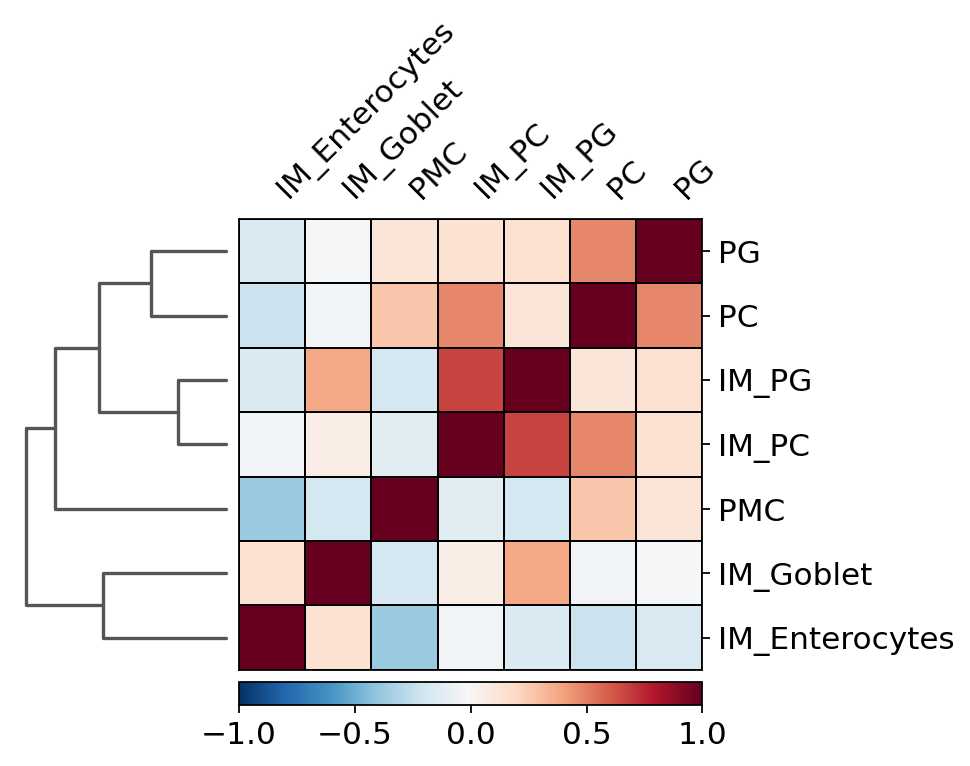

In [42]:
ax = sc.pl.correlation_matrix(Epi, 'Epi_celltype', figsize=(5.5,4),cmap='RdBu_r',show=False)
plt.savefig("Gastric/Figure/Figure4/Figure4_D.png",dpi=300,bbox_inches = 'tight')

In [43]:

marker_genes_dict = {
    'PMC':['GKN1','GKN2','MUC5AC','TFF1'],
    'PC':['MKI67','HMGB2','STMN1'],
    'PG':['MUC6','PGC'],
    'Enterocytes':['FABP1','FABP2','CDH17','CLDN7','CLDN4',], 
    'Goblet':['MUC2','ITLN1','TFF3','SPINK4'],
    'IM_Marker':['REG4','CDX1','CDX2'],
}

    using 'X_pca' with n_pcs = 100
Storing dendrogram info using `.uns['dendrogram_Epi_celltype']`


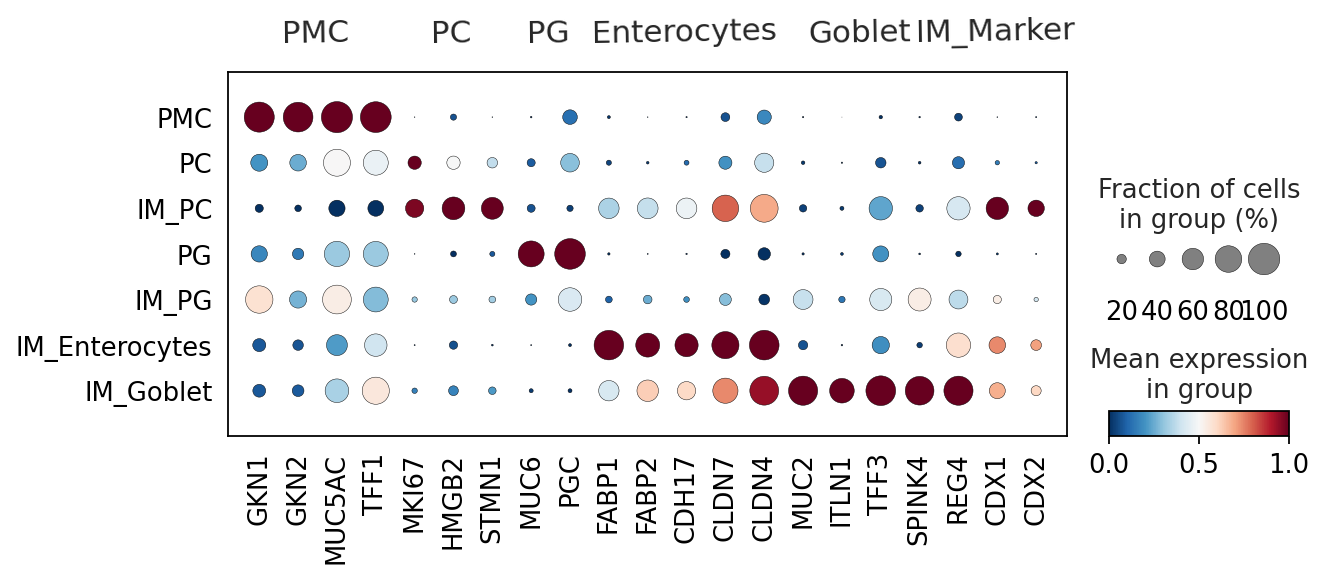

In [44]:
sc.tl.dendrogram(Epi,groupby='Epi_celltype')

ax = sc.pl.dotplot(
    Epi,
    marker_genes_dict,
    groupby='Epi_celltype',
    dendrogram=False,
    swap_axes=False,
    use_raw=True,
    standard_scale="var",
    color_map="RdBu_r",
    var_group_labels=False,
    figsize=(8.5,3),
    return_fig=False,
    show=False,
    var_group_rotation=True,
)

plt.savefig("Gastric/Figure/Figure4/Figure4_E.png",dpi=300,bbox_inches = 'tight')

In [18]:
adata_raw = sc.read_h5ad('Gastric/Data/Gastric_Origin.h5ad')
adata_raw

AnnData object with n_obs × n_vars = 63398 × 32559
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [19]:
Epi_raw = adata_raw[Epi.obs_names,:]
Epi_raw = Epi_raw[:,~Epi_raw.var_names.str.contains('RPS')]
Epi_raw = Epi_raw[:,~Epi_raw.var_names.str.contains('RPL')]
Epi_raw.obs = Epi.obs
#normalize and high variable genes (HVGs) calculated
Epi=ov.pp.preprocess(Epi_raw,mode='shiftlog|pearson',n_HVGs=3000,)

#save the whole genes and filter the non-HVGs
Epi.raw = Epi
Epi = Epi[:, Epi.var.highly_variable_features]

Epi.layers['lognorm'] = Epi.X
Epi

Begin robust gene identification
After filtration, 30683/32115 genes are kept. Among 30683 genes, 21247 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['DEFA5', 'DEFA6', 'GKN1', 'IGHV1-69D', 'IGHV2-5', 'IGHV3-53', 'IGKV1D-13', 'IGKV1D-33', 'IGKV3-11', 'IGKV3-20', 'IGLV1-40', 'IGLV2-11', 'IGLV2-14', 'IGLV2-23', 'IGLV3-21', 'IGLV3-25', 'MALAT1', 'MT-RNR2', 'MUC5AC', 'PGA3', 'PGC', 'PHGR1', 'REG3A', 'SPINK4', 'TFF1']
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variance

AnnData object with n_obs × n_vars = 26265 × 3000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'Epi_celltype', 'IM'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts', 'lognorm'
    obsp: 'connectivities', 'distances'

# Helicobacter pylori target analysis

reference:https://www.nature.com/articles/s41467-022-33165-4

computing score 'Helicobacter pylori target score'
    finished: added
    'Helicobacter pylori target score', score of gene set (adata.obs).
    50 total control genes are used. (0:00:00)


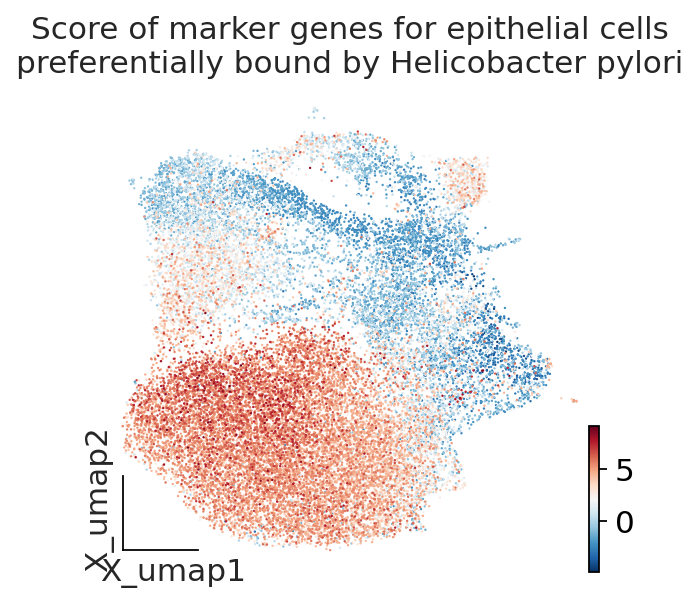

In [60]:
Epi_all_genes = Epi.raw.to_adata()
select_gene =  ['GKN1','GKN2','PHGR1','PSCA','CEACAM5']
sc.tl.score_genes(Epi_all_genes, select_gene, score_name='Helicobacter pylori target score')


fig,axes=plt.subplots( figsize = (4,4))
ov.utils.embedding(
    Epi_all_genes,
    color=["Helicobacter pylori target score"],
    title='Score of marker genes for epithelial cells\npreferentially bound by Helicobacter pylori',
    basis="X_umap",
    color_map="RdBu_r",
    frameon='small',
    show =False,
    ax=axes
)
plt.savefig("Gastric/Figure/Figure4/Figure4_F.png",dpi=300,bbox_inches = 'tight')

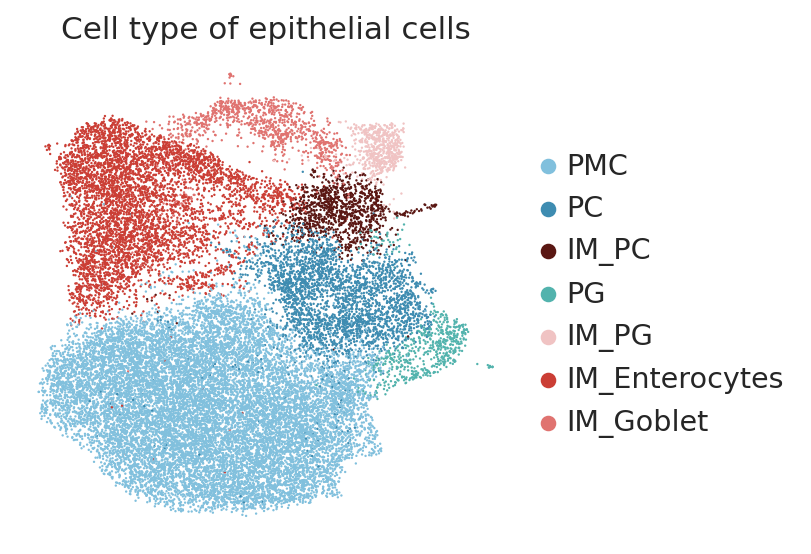

In [61]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots( figsize = (4,4))
ax = ov.utils.embedding(Epi,
                basis='X_umap',
                color=['Epi_celltype'],
                title='Cell type of epithelial cells',
                frameon=False,
                show=False,
                ax=ax)

plt.savefig("Gastric/Figure/Figure4/Figure4_B.png",dpi=300,bbox_inches = 'tight')

# Trajectory

In [ ]:
v0 = ov.single.pyVIA(adata=Epi,adata_key='X_scVI',adata_ncomps=10, basis='X_umap',
                     too_big_factor=0.5,small_pop=90, #new parameter
                    resolution_parameter=0.2,
                         clusters='Epi_celltype',knn=30,random_seed=4,root_user=['PMC'],)

v0.run()

In [ ]:
fig, ax, ax1 = v0.plot_piechart_graph(clusters='Epi_celltype',cmap='Reds',dpi=80,
                                   show_legend=False,ax_text=False,fontsize=4)
ax.set_title('Cell type')
#fig.savefig('figures/via_fig2.png',dpi=300,bbox_inches = 'tight')

In [ ]:
fig,ax1,ax2=v0.plot_trajectory_gams(basis='X_umap',clusters='Epi_celltype',draw_all_curves=False,cmap_pseudotime ='summer',figsize=(9,4))
ax1.legend().set_visible(False)  
ax2.legend().set_visible(False)  

plt.savefig("Gastric/Figure/Figure4/Figure4_G.png",dpi=300,bbox_inches = 'tight')

In [ ]:
plt.show()

In [ ]:
for ax in fig.get_axes():
    print(ax.get_position())

In [ ]:
for ax in fig.get_axes():
    if ax.get_position().width < 0.05 or ax.get_position().height < 0.05:
        ax.remove()

In [ ]:
fig,ax=v0.plot_stream(basis='X_umap',density_grid=0.8, scatter_size=30, color_scheme='time', linewidth=0.5,
                             min_mass = 1, cutoff_perc = 5, scatter_alpha=0.3, marker_edgewidth=0.1,cmap_str='summer',
                             density_stream = 2, smooth_transition=1, smooth_grid=0.5)
plt.savefig("Gastric/Figure/Figure4/Figure4_H.png",dpi=300,bbox_inches = 'tight')

In [ ]:
#gene_list_magic = ['GZMB','GZMA','SLAMF7','KLRK1','IFNG','XCL1']
gene_list_magic = ['FABP1','FABP2','CDH17','CLDN7','CLDN4','REG4','CDX1','CDX2'] 

In [ ]:
v0.adata = Epi_all_genes
v0.adata

In [ ]:
fontsize_ = 12
fig,axs=v0.plot_gene_trend(gene_list=gene_list_magic,figsize=(12,4))    
handles, labels = axs[0,0].get_legend_handles_labels()
print(labels)
labels = ['Enterocytes-1','Proliferative cell','Enterocytes-2']
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.15))
    #fig.suptitle('My Figure Title', fontsize=16, fontweight='bold')
    #fig.text(0.5, 0.03, 'Time', ha='center', fontsize=fontsize_+2)
    #fig.text(0.04, 0.5, 'Intensity', va='center', rotation='vertical', fontsize=fontsize_+2)
fig.text(0.5, 0, 'Pesudotime', ha='center', fontsize=fontsize_+2)
fig.text(0, 0.5, 'Gene Expression', va='center', rotation='vertical', fontsize=fontsize_+2)

fig.savefig('Gastric/Figure/Figure4/Figure4_I',dpi=300,bbox_inches = 'tight')